In [0]:
import os

In [0]:
#!unzip '/content/drive/My Drive/DATA/dog-breed-identification.zip' -d '/content/'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
Data = pd.read_csv('labels.csv')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train_path = '/content/train/'
test_path = '/content/test/'

In [0]:
def get_arr():
  x = []
  for i in os.listdir(test_path)[:9:-1]:
    x.append(test_path+i)
  return x
x = get_arr()

In [0]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image
  
def get_label(file_path,label):
  image = process_image(file_path)
  return image,label

Batch_size= 32
def get_batch(x,y=None,batch_size=Batch_size,valid_data=False,test_data=False):
  if test_data:
    print('creating test data batches......')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch = data.map(process_image).batch(Batch_size)
    return data_batch
  elif valid_data:
    print('creating validation data........')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data_batch = data.map(get_label).batch(Batch_size)
    return data_batch
  else:
    print('creating train batches........')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                               tf.constant(y)))
    data = data.shuffle(buffer_size=len(x))
    
    data = data.map(get_label)
    
    data_batch = data.batch(Batch_size)
    return data_batch

In [7]:
test_data = get_batch(x=x,test_data=True)

creating test data batches......


In [0]:
from tensorflow.keras.models import load_model


In [0]:
import tensorflow_hub as hub
loaded_model = load_model('/content/drive/My Drive/DATA/Dog vision/model/dogvision.h5',custom_objects={"KerasLayer":hub.KerasLayer})

In [0]:
data = pd.read_csv('labels.csv')
unique_breeds = np.unique(data['breed'])
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]


In [0]:
custom_preds = loaded_model.predict(test_data)
preds_label = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]

In [0]:
custom_images = []
# Loop through unbatched data
for image in test_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

ValueError: ignored

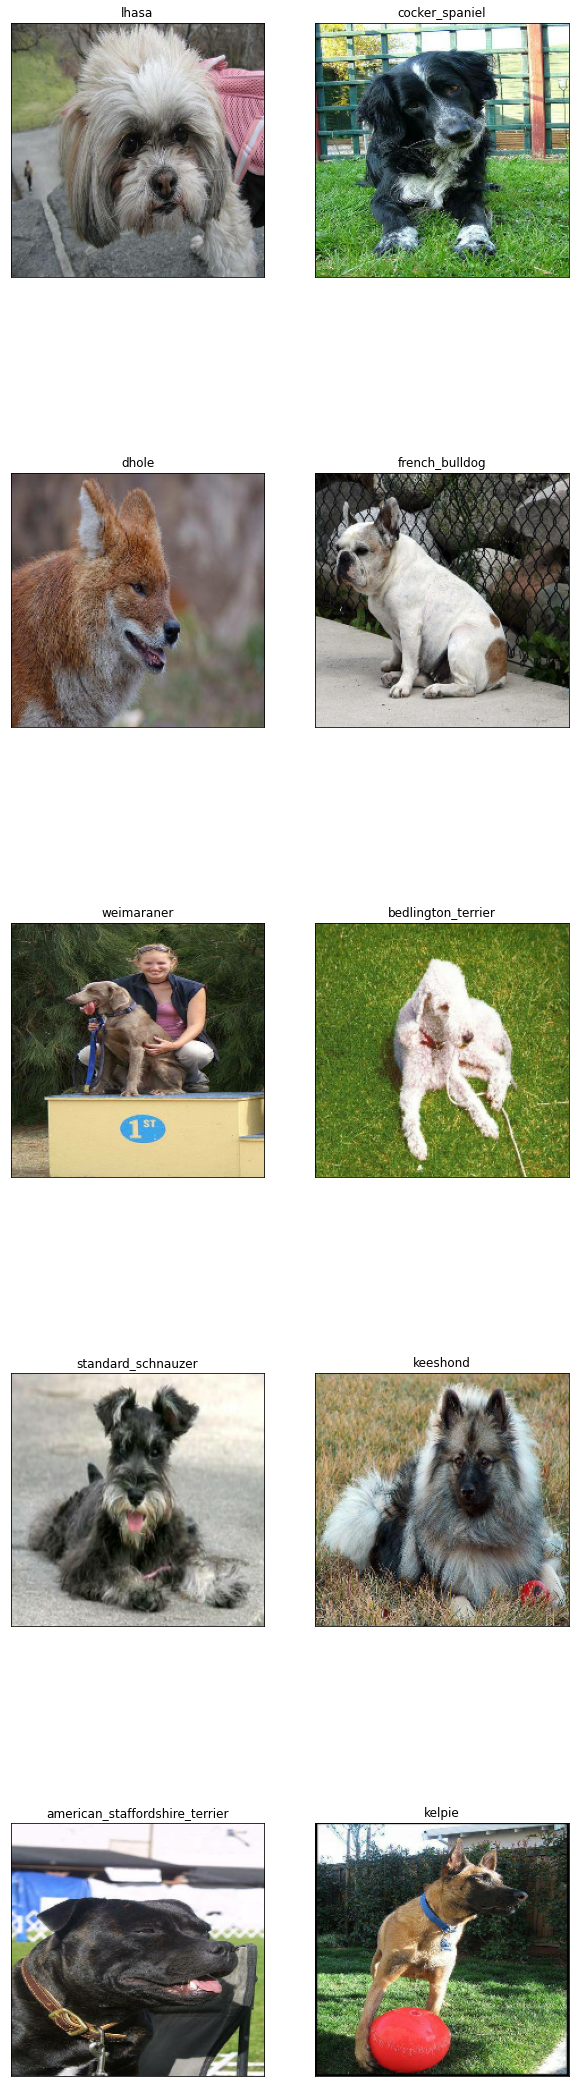

In [13]:
plt.figure(figsize=(10,40))
for i,image in enumerate(custom_images):
  plt.subplot(5,2,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(preds_label[i])
  plt.imshow(image)